<a href="https://colab.research.google.com/github/BenjaminRathman/Iris-Logistical-Regression-model/blob/main/Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
path = "/content/drive/MyDrive/Flowers dataset/Iris.csv"
df = pd.read_csv(path)
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = "white", color_codes=True)


In [4]:
df["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


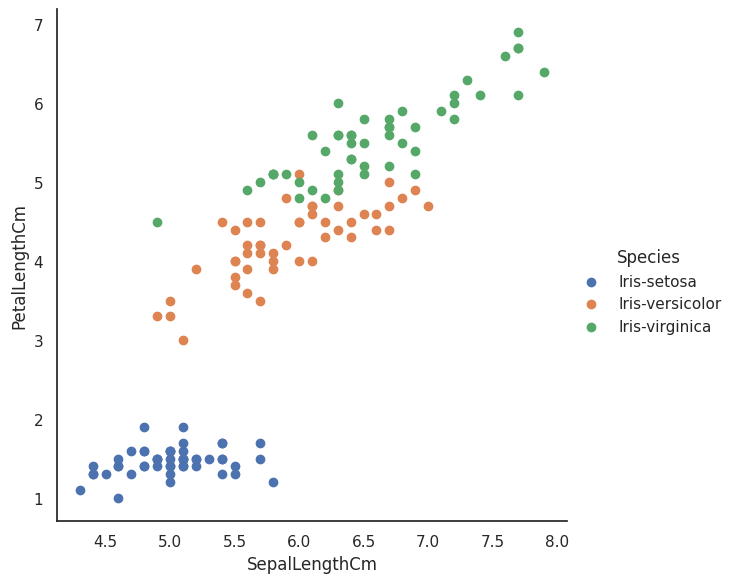

In [5]:
sns.FacetGrid(df,hue="Species",height=6,).map(plt.scatter,"SepalLengthCm","PetalLengthCm").add_legend()

Logistical regression model

In [6]:
flower_mapping = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
df["Species"] = df["Species"].map(flower_mapping)
print(df["Species"].values)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
from sklearn.model_selection import train_test_split
x = df[['SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm',	'PetalWidthCm']].values
y = df[["Species"]].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# this is splitting the data
print(x_test)

[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]
 [6.8 2.8 4.8 1.4]
 [5.4 3.4 1.5 0.4]
 [5.6 2.9 3.6 1.3]
 [6.9 3.1 5.1 2.3]
 [6.2 2.2 4.5 1.5]
 [5.8 2.7 3.9 1.2]
 [6.5 3.2 5.1 2. ]
 [4.8 3.  1.4 0.1]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [5.1 3.8 1.5 0.3]
 [6.3 3.3 4.7 1.6]
 [6.5 3.  5.8 2.2]
 [5.6 2.5 3.9 1.1]
 [5.7 2.8 4.5 1.3]
 [6.4 2.8 5.6 2.2]
 [4.7 3.2 1.6 0.2]
 [6.1 3.  4.9 1.8]
 [5.  3.4 1.6 0.4]
 [6.4 2.8 5.6 2.1]
 [7.9 3.8 6.4 2. ]
 [6.7 3.  5.2 2.3]
 [6.7 2.5 5.8 1.8]
 [6.8 3.2 5.9 2.3]
 [4.8 3.  1.4 0.3]
 [4.8 3.1 1.6 0.2]]


In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

In [11]:
model.score(x_test,y_test)

1.0

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

